<a href="https://colab.research.google.com/github/ingo198123/MiniDatathonF5_USACovid19/blob/main/Data_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

In [ ]:
gdrive_dir = '/content/drive/'

drive.mount(gdrive_dir, force_remount=True)

Mounted at /content/drive/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# URLs for different datasets
daily_url = 'https://api.covidtracking.com/v1/us/daily.csv'
info_url = 'https://api.covidtracking.com/v1/states/info.csv'

# Loading datasets into separate dataframes
daily_df = pd.read_csv(daily_url)
info_df = pd.read_csv(info_url)


# 1. Data Import and Exploration

In [ ]:
# Display the first few rows of each dataset
print("Daily Data Preview:")
display(daily_df.head())

print("\nState Info Data Preview:")
display(info_df.head())

# Explore data structure, missing values, and data types
print("\nDaily Data Information:")
print(daily_df.info())
print("\nMissing Values in Daily Data:")
print(daily_df.isnull().sum())

print("\nState Info Data Information:")
print(info_df.info())
print("\nMissing Values in State Info Data:")
print(info_df.isnull().sum())

Daily Data Preview:


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0



State Info Data Preview:


,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,covid19SiteQuaternary,covid19SiteQuinary,twitter,covid19SiteOld,covidTrackingProjectPreferredTotalTestUnits,covidTrackingProjectPreferredTotalTestField,totalTestResultsField,pui,pum,name,fips
0,AK,Alaska combines PCR and antigen tests in the t...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://experience.arcgis.com/experience/ed1c8...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Alaska,2
1,AL,Alabama combines PCR and antigen tests in the ...,https://alpublichealth.maps.arcgis.com/apps/op...,https://alpublichealth.maps.arcgis.com/apps/op...,https://services7.arcgis.com/4RQmZZ0yaZkGR1zy/...,NaN,NaN,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,People,totalTestsPeopleViral,Total PCR Tests (People),No data,False,Alabama,1
2,AR,Arkansas reports a category of “non-COVID deat...,https://www.healthy.arkansas.gov/programs-serv...,https://experience.arcgis.com/experience/c2ef4...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arkansas,5
3,AS,American Samoa does not have a regularly updat...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NaN,NaN,NaN,NaN,http://www.samoagovt.ws/2020/03/ministry-of-he...,Specimens,totalTestsViral,Total Tests (PCR),No Data,False,American Samoa,60
4,AZ,Arizona combines PCR and antigen tests in the ...,https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://www.azdhs.gov/preparedness/epidemiolog...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arizona,4



Daily Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null  

# 1. Data Cleaning and Preprocessing

In [ ]:
# Handle missing values
# Strategy: For simplicity, let's fill numeric missing values with the median and categorical with the mode.
daily_df.fillna(daily_df.median(numeric_only=True), inplace=True)
info_df.fillna(info_df.mode().iloc[0], inplace=True)

# Check for outliers using the Z-score method
z_scores = np.abs(stats.zscore(daily_df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()

print("\nNumber of Outliers Detected in Daily Data (Z > 3):")
print(outliers)

# Ensure that quantile calculations only apply to numeric columns
numeric_cols = daily_df.select_dtypes(include=[np.number]).columns

# Calculate the IQR (Interquartile Range) for numeric columns only
Q1 = daily_df[numeric_cols].quantile(0.25)
Q3 = daily_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap and floor outliers for numeric columns only
daily_df[numeric_cols] = daily_df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Preview cleaned data
print("\nCleaned Daily Data:")
display(daily_df.head())





Number of Outliers Detected in Daily Data (Z > 3):
date                         0
states                       0
positive                     0
negative                     0
pending                     10
hospitalizedCurrently        0
hospitalizedCumulative       0
inIcuCurrently               0
inIcuCumulative              0
onVentilatorCurrently        0
onVentilatorCumulative       0
death                        0
hospitalized                 0
totalTestResults             0
recovered                    0
total                        0
posNeg                       0
deathIncrease                2
hospitalizedIncrease         3
negativeIncrease             2
positiveIncrease             2
totalTestResultsIncrease     0
dtype: int64

Cleaned Daily Data:


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20202165.5,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842.0,726.0,131835.0,41835.0,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20202165.5,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680.0,503.0,143835.0,60015.0,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20202165.5,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221.0,2781.0,271917.0,68787.0,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20202165.5,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743.0,1530.0,177957.0,65487.0,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20202165.5,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449.0,2172.0,267001.0,66836.0,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [ ]:
# Check data types
print("\nData Types Before Conversion:")
print(daily_df.dtypes)

# Convert columns to numeric if needed (forcing errors to NaN)
daily_df[numeric_cols] = daily_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Re-check missing values after conversion (especially if there were non-numeric entries)
print("\nMissing Values After Type Conversion:")
print(daily_df.isnull().sum())



Data Types Before Conversion:
date                        float64
states                        int64
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
dateChecked                  object
death                       float64
hospitalized                float64
totalTestResults              int64
lastModified                 object
recovered                   float64
total                         int64
posNeg                        int64
deathIncrease               float64
hospitalizedIncrease        float64
negativeIncrease            float64
positiveIncrease            float64
totalTestResultsIncrease      int64
hash                         object
dtype: object

Missing Values After Type Conversion:
date            

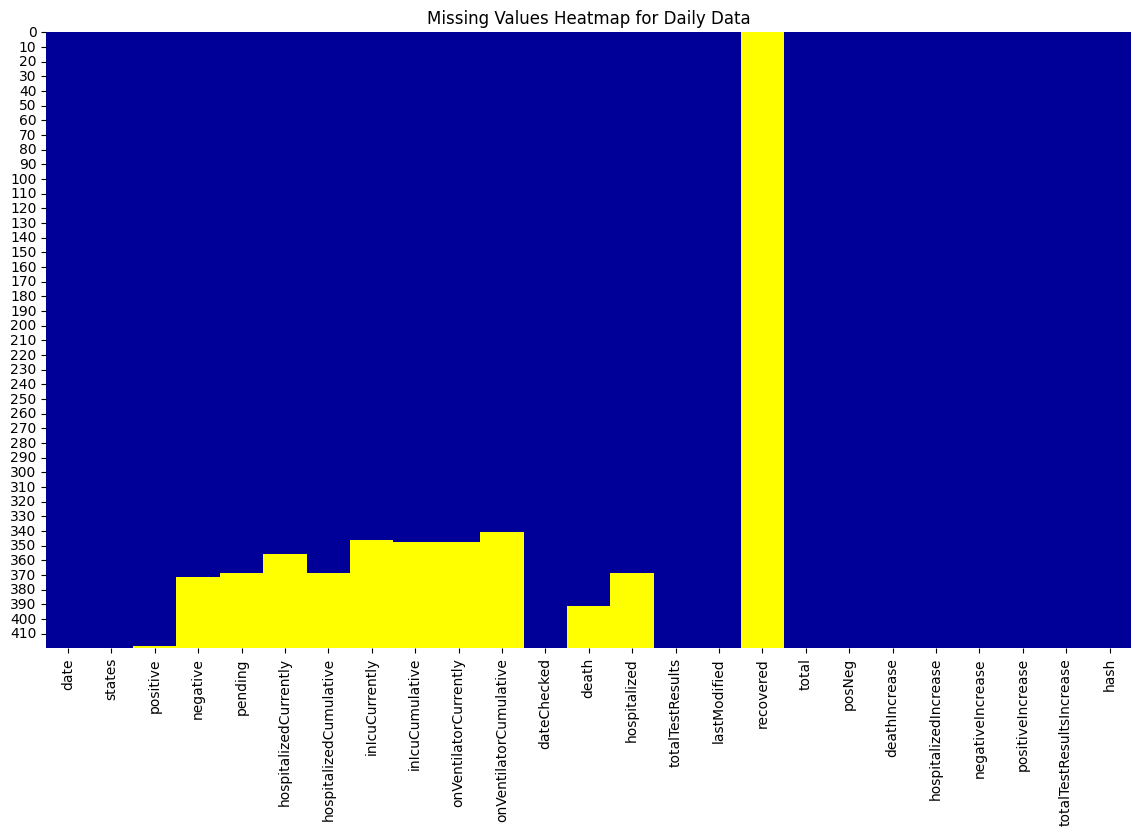

In [ ]:
# Define the columns you want to check for missing values
cols = daily_df.columns

# Define a color palette for the heatmap
colours = ['#000099', '#ffff00']  # Blue for present, yellow for missing

# Plot the heatmap of missing values
plt.figure(figsize=(14, 8))
sns.heatmap(daily_df[cols].isnull(), cmap=sns.color_palette(colours), cbar=False)
plt.title('Missing Values Heatmap for Daily Data')
plt.show()



*   cols: The code uses the columns from your daily_df DataFrame.

*   colours: The palette uses blue for non-missing values (#000099) and yellow for missing values (#ffff00).

*   sns.heatmap: The heatmap visually indicates which parts of your data contain missing values.


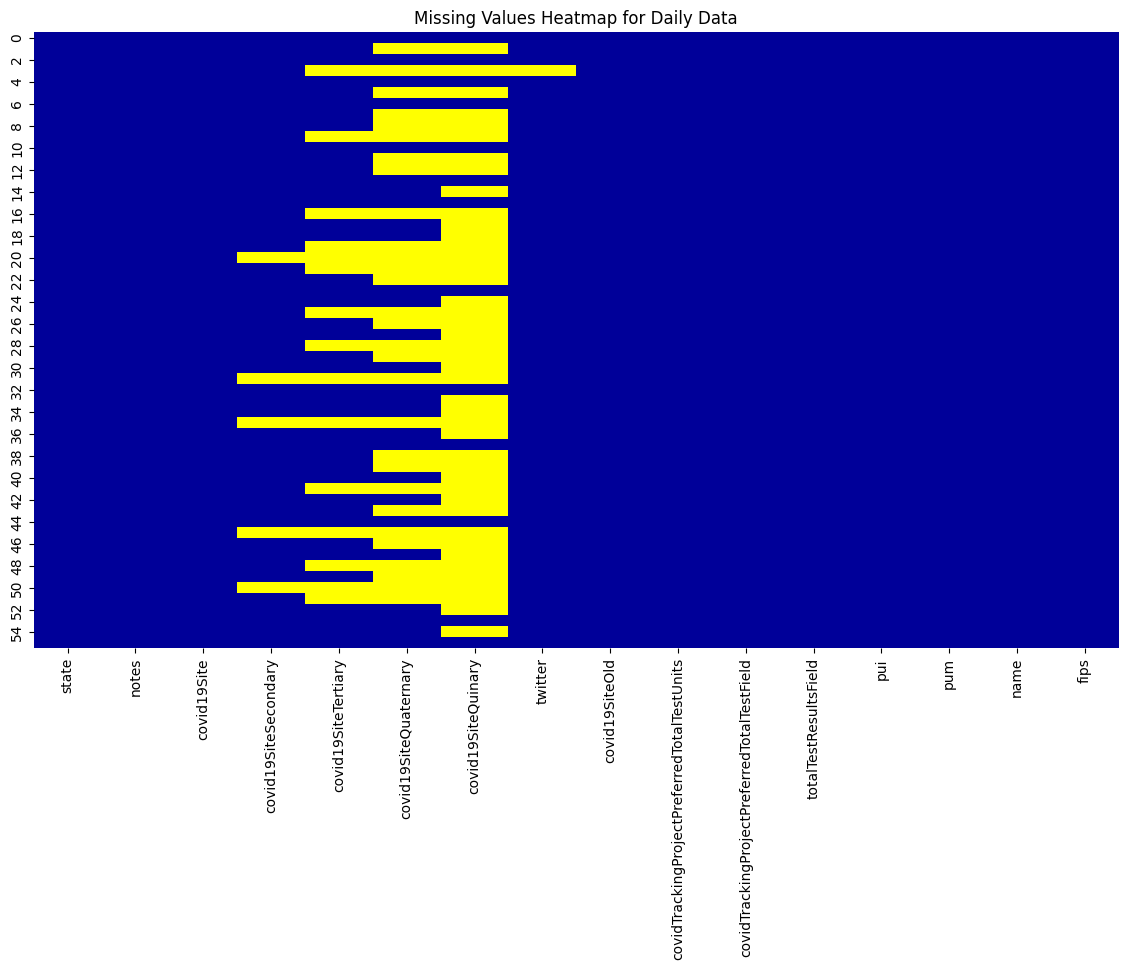

In [ ]:
# Define the columns you want to check for missing values
cols = info_df.columns

# Define a color palette for the heatmap
colours = ['#000099', '#ffff00']  # Blue for present, yellow for missing

# Plot the heatmap of missing values
plt.figure(figsize=(14, 8))
sns.heatmap(info_df[cols].isnull(), cmap=sns.color_palette(colours), cbar=False)
plt.title('Missing Values Heatmap for Daily Data')
plt.show()

Missing Values in daily_df:
date - 0%
states - 0%
positive - 0%
negative - 11%
pending - 12%
hospitalizedCurrently - 15%
hospitalizedCumulative - 12%
inIcuCurrently - 17%
inIcuCumulative - 17%
onVentilatorCurrently - 17%
onVentilatorCumulative - 19%
dateChecked - 0%
death - 7%
hospitalized - 12%
totalTestResults - 0%
lastModified - 0%
recovered - 100%
total - 0%
posNeg - 0%
deathIncrease - 0%
hospitalizedIncrease - 0%
negativeIncrease - 0%
positiveIncrease - 0%
totalTestResultsIncrease - 0%
hash - 0%


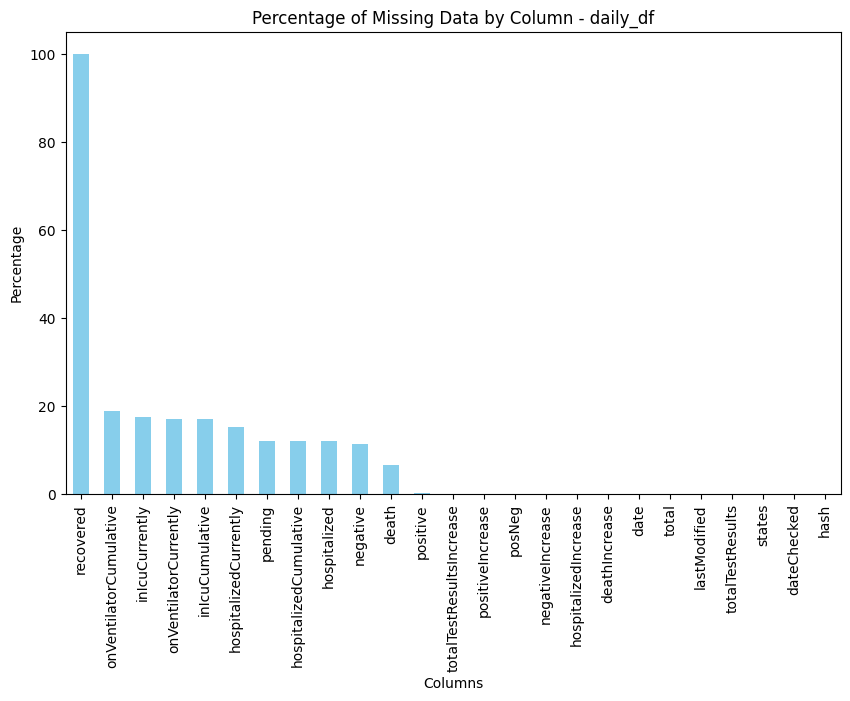

In [ ]:
print("Missing Values in daily_df:")
for col in daily_df.columns:
    pct_missing = np.mean(daily_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# Plot for daily_df, enhanced Visualization with Bar Charts
missing_data_daily = daily_df.isnull().mean() * 100
plt.figure(figsize=(10, 6))
missing_data_daily.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data by Column - daily_df')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

### First Code Block (Text Output): It prints the percentage of missing data for each column in both daily_df and info_df.
### Second Code Block (Bar Charts): It generates bar charts for the percentage of missing data in each column, one for daily_df and one for info_df, with different colors to distinguish the datasets.


Missing Values in info_df:
state - 0%
notes - 0%
covid19Site - 0%
covid19SiteSecondary - 9%
covid19SiteTertiary - 27%
covid19SiteQuaternary - 52%
covid19SiteQuinary - 77%
twitter - 2%
covid19SiteOld - 0%
covidTrackingProjectPreferredTotalTestUnits - 0%
covidTrackingProjectPreferredTotalTestField - 0%
totalTestResultsField - 0%
pui - 0%
pum - 0%
name - 0%
fips - 0%


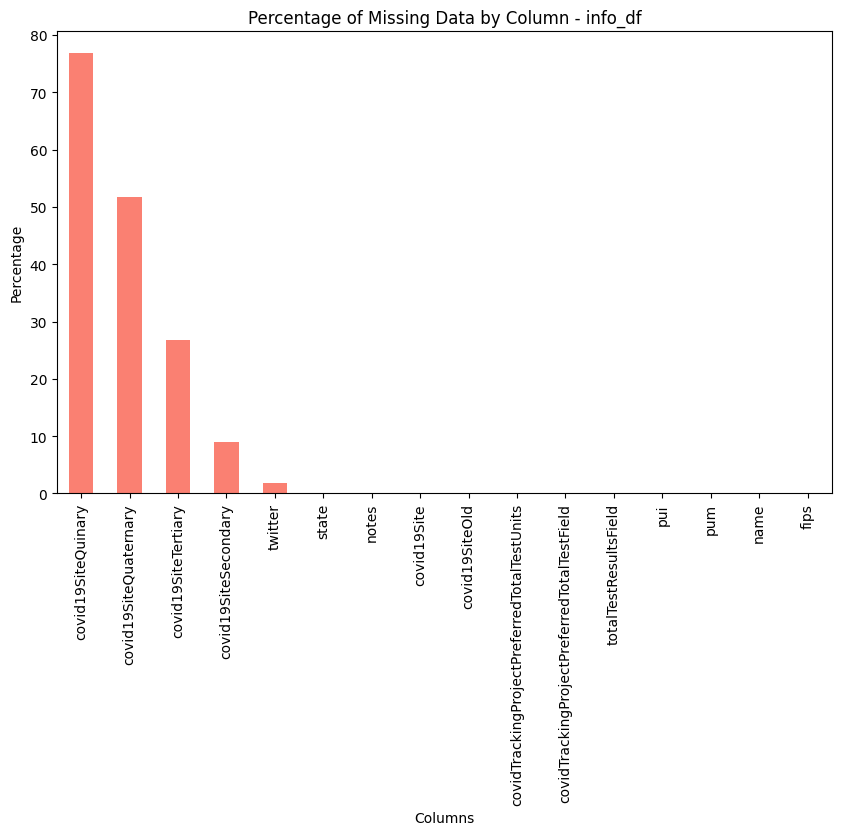

In [ ]:
print("\nMissing Values in info_df:")
for col in info_df.columns:
    pct_missing = np.mean(info_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# Plot for info_df
missing_data_info = info_df.isnull().mean() * 100
plt.figure(figsize=(10, 6))
missing_data_info.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Data by Column - info_df')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Step 1: Check for infinite values in the dataset
print("Checking for infinite values:")
print(daily_df[numeric_cols].isin([np.inf, -np.inf]).sum())

# Replace infinite values with NaN, then handle NaNs
daily_df[numeric_cols].replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Check for large values that could be problematic
print("Checking for large values:")
print(daily_df[numeric_cols].max())

# Step 3: Handle NaNs (if any remain) by filling with the median of each column
daily_df[numeric_cols].fillna(daily_df[numeric_cols].median(), inplace=True)

# Step 4: Apply StandardScaler again
scaler = StandardScaler()
daily_df[numeric_cols] = scaler.fit_transform(daily_df[numeric_cols])

# Preview cleaned and scaled data
print("\nCleaned and Scaled Daily Data:")
display(daily_df.head())

Checking for infinite values:
date                        0
states                      0
positive                    0
negative                    0
pending                     0
hospitalizedCurrently       0
hospitalizedCumulative      0
inIcuCurrently              0
inIcuCumulative             0
onVentilatorCurrently       0
onVentilatorCumulative      0
death                       0
hospitalized                0
totalTestResults            0
recovered                   0
total                       0
posNeg                      0
deathIncrease               0
hospitalizedIncrease        0
negativeIncrease            0
positiveIncrease            0
totalTestResultsIncrease    0
dtype: int64
Checking for large values:
date                        2.020217e+07
states                      5.600000e+01
positive                    2.875649e+07
negative                    7.458282e+07
pending                     2.374575e+04
hospitalizedCurrently       9.329938e+04
hospitalizedCumulative  

<ipython-input-18-4bb1117ceeb3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df[numeric_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-18-4bb1117ceeb3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df[numeric_cols].fillna(daily_df[numeric_cols].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = n

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,positivity_rate
0,2.010911,0.0,2.307635,1.969002,0.587089,-0.576835,2.126068,-0.691249,2.005730,-0.515520,...,NaN,0.0,0.0,-0.358085,-0.742401,-0.405794,-0.382802,0.462304,a80d0063822e251249fd9a44730c49cb23defd83,3.575461
1,2.010911,0.0,2.302959,1.963180,0.582262,-0.523625,2.122779,-0.638113,2.003951,-0.511050,...,NaN,0.0,0.0,0.487273,-0.898747,-0.301972,-0.087611,0.859364,dae5e558c24adb86686bbd58c08cce5f610b8bb0,4.193944
2,2.010911,0.0,2.296251,1.956829,0.665288,-0.473159,2.120500,-0.594639,1.997482,-0.472315,...,NaN,0.0,0.0,1.033024,0.698373,0.806166,0.054821,1.336301,724844c01659d0103801c57c0f72bf8cc8ab025c,3.943266
3,2.010911,0.0,2.288563,1.944822,0.702360,-0.400958,2.107900,-0.529717,1.991013,-0.430599,...,NaN,0.0,0.0,0.550827,-0.178711,-0.006756,0.001238,1.102823,5c549ad30f9abf48dc5de36d20fa707014be1ff3,4.116132
4,2.010911,0.0,2.281244,1.936964,0.581297,-0.343852,2.100968,-0.454555,1.984625,-0.370510,...,NaN,0.0,0.0,1.263026,0.271399,0.763634,0.023142,0.822544,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,4.750941


In [ ]:
# Feature engineering example: Adding a "positivity_rate" feature (if applicable)
if 'positiveIncrease' in daily_df.columns and 'totalTestResultsIncrease' in daily_df.columns:
    daily_df['positivity_rate'] = daily_df['positiveIncrease'] / daily_df['totalTestResultsIncrease'] * 100

# Data normalization (if needed for specific analysis like clustering)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = daily_df.select_dtypes(include=[np.number]).columns
daily_df[numerical_cols] = scaler.fit_transform(daily_df[numerical_cols])

# Preview cleaned data
print("\nCleaned Daily Data:")
display(daily_df.head())


Cleaned Daily Data:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,positivity_rate
0,2.010911,0.0,2.307635,1.969002,0.587089,-0.576835,2.126068,-0.691249,2.005730,-0.515520,...,NaN,0.0,0.0,-0.358085,-0.742401,-0.405794,-0.382802,0.462304,a80d0063822e251249fd9a44730c49cb23defd83,-0.345640
1,2.010911,0.0,2.302959,1.963180,0.582262,-0.523625,2.122779,-0.638113,2.003951,-0.511050,...,NaN,0.0,0.0,0.487273,-0.898747,-0.301972,-0.087611,0.859364,dae5e558c24adb86686bbd58c08cce5f610b8bb0,-0.222429
2,2.010911,0.0,2.296251,1.956829,0.665288,-0.473159,2.120500,-0.594639,1.997482,-0.472315,...,NaN,0.0,0.0,1.033024,0.698373,0.806166,0.054821,1.336301,724844c01659d0103801c57c0f72bf8cc8ab025c,-0.198167
3,2.010911,0.0,2.288563,1.944822,0.702360,-0.400958,2.107900,-0.529717,1.991013,-0.430599,...,NaN,0.0,0.0,0.550827,-0.178711,-0.006756,0.001238,1.102823,5c549ad30f9abf48dc5de36d20fa707014be1ff3,-0.204938
4,2.010911,0.0,2.281244,1.936964,0.581297,-0.343852,2.100968,-0.454555,1.984625,-0.370510,...,NaN,0.0,0.0,1.263026,0.271399,0.763634,0.023142,0.822544,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,-0.200354


# 3. Exploratory Data Analysis (EDA)

# Ensure Only Numeric Columns Are Included in the Correlation Matrix:
## You can filter out non-numeric columns before generating the heatmap:

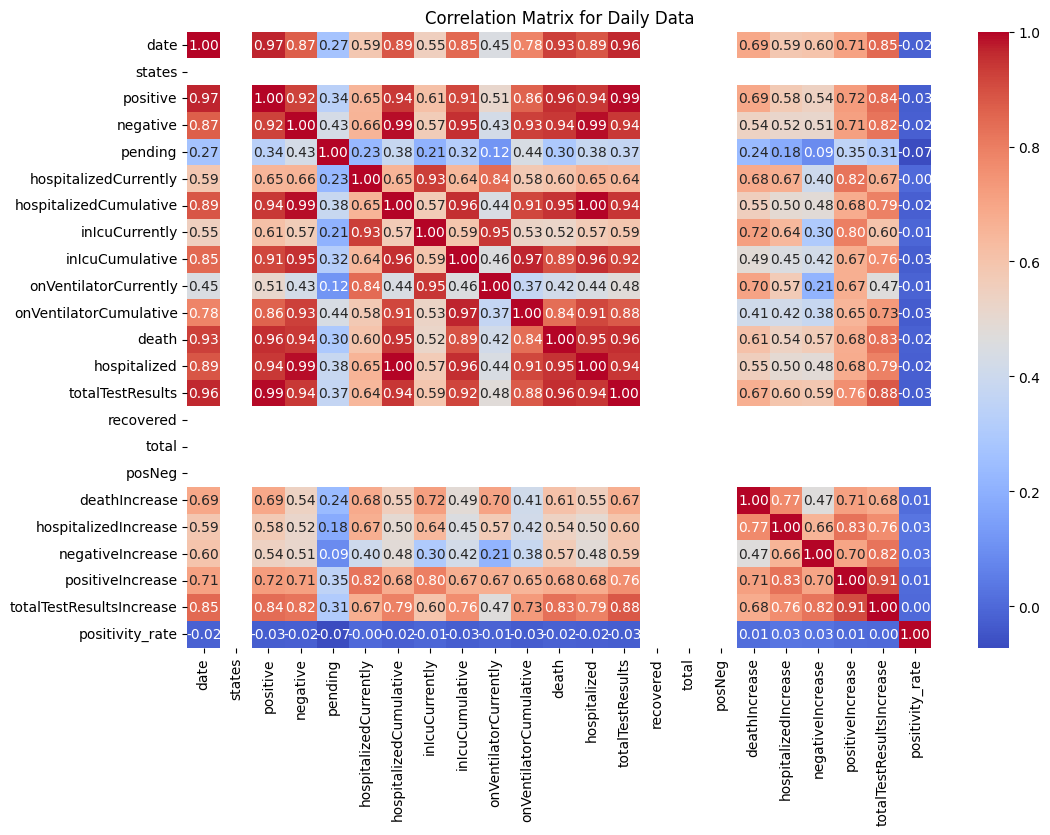

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = daily_df.select_dtypes(include=[np.number])

# Generate the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Daily Data')
plt.show()

# Handling Dates and Timestamps:
### If your dataset contains dates or timestamps, those columns should be excluded from correlation calculations or converted to numeric format if they’re needed for analysis.

### If you want to include dates for time-series analysis, consider converting them to a numeric format like Unix timestamps or separating them into components like year, month, and day.

### Here’s how you can handle timestamps:

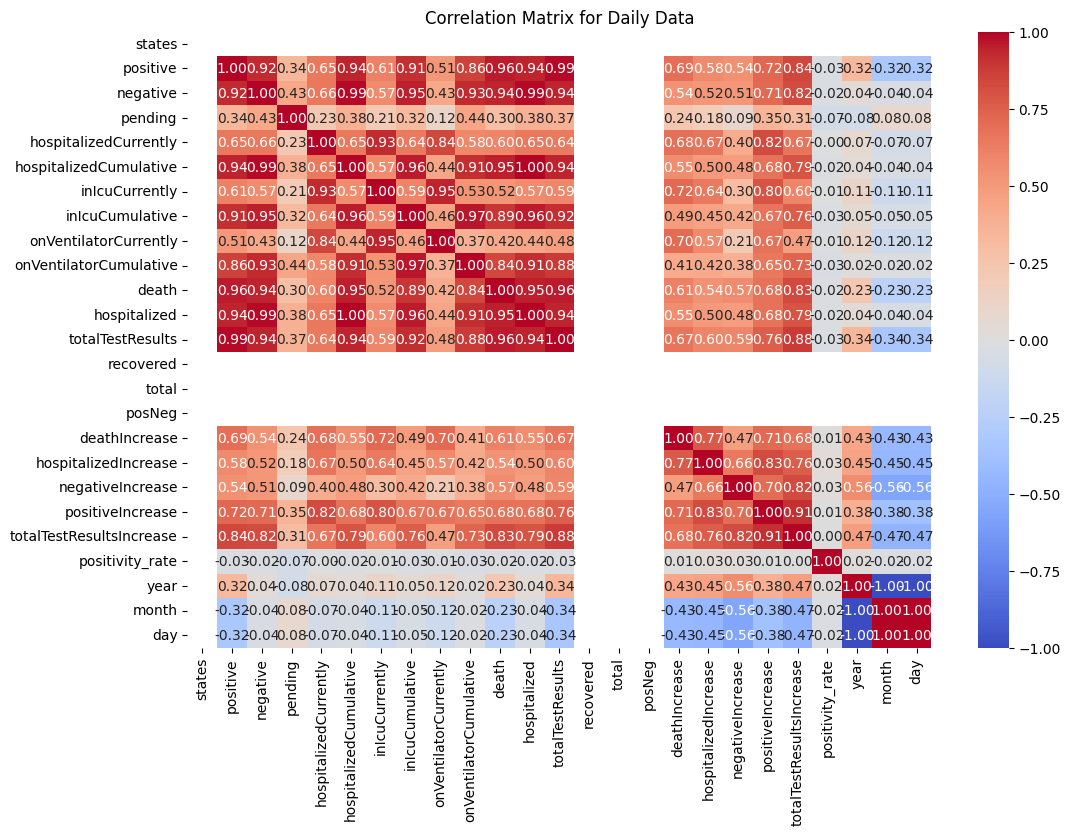

In [ ]:
# Convert timestamp columns to datetime if they are not already
daily_df['date'] = pd.to_datetime(daily_df['date'], errors='coerce')

# Optionally, extract useful components (e.g., year, month, day) if you need them for analysis
daily_df['year'] = daily_df['date'].dt.year
daily_df['month'] = daily_df['date'].dt.month
daily_df['day'] = daily_df['date'].dt.day

# Now exclude the original date column if it’s not needed for correlation analysis
numeric_data = daily_df.select_dtypes(include=[np.number])

# Generate the correlation matrix again
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Daily Data')
plt.show()


Summary
Filter out non-numeric columns before calculating correlations.
Handle timestamps separately—either exclude them or extract numeric components (like year, month, etc.).

# 4. Statistical Analysis
We can perform hypothesis testing, correlation analysis, and even regression analysis.

In [ ]:
# Hypothesis Testing: Is the positivity rate significantly different from a given threshold?
from scipy.stats import ttest_1samp

# Example hypothesis: Is the mean positivity rate significantly different from 5%?
if 'positivity_rate' in daily_df.columns:
    t_stat, p_value = ttest_1samp(daily_df['positivity_rate'].dropna(), 5)
    print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

    if p_value < 0.05:
        print("Reject the null hypothesis: The positivity rate is significantly different from 5%.")
    else:
        print("Fail to reject the null hypothesis: The positivity rate is not significantly different from 5%.")

# Correlation Analysis: Pearson correlation between key variables
if 'positiveIncrease' in daily_df.columns and 'hospitalizedIncrease' in daily_df.columns:
    correlation, p_value = stats.pearsonr(daily_df['positiveIncrease'], daily_df['hospitalizedIncrease'])
    print(f"\nPearson Correlation between Positive Increase and Hospitalized Increase: {correlation:.2f}, P-Value: {p_value:.4f}")

# Linear Regression: Predicting positivity rate based on positiveIncrease
from sklearn.linear_model import LinearRegression

if 'positivity_rate' in daily_df.columns:
    X = daily_df[['positiveIncrease']]
    y = daily_df['positivity_rate']

    model = LinearRegression()
    model.fit(X, y)

    print(f"\nLinear Regression Coefficient (Slope): {model.coef_[0]:.2f}")
    print(f"Linear Regression Intercept: {model.intercept_:.2f}")


T-Statistic: -102.35, P-Value: 0.0000
Reject the null hypothesis: The positivity rate is significantly different from 5%.

Pearson Correlation between Positive Increase and Hospitalized Increase: 0.83, P-Value: 0.0000

Linear Regression Coefficient (Slope): 0.01
Linear Regression Intercept: 0.00


# 5. Report

## COVID-19 Data Analysis Report

### 1. Data Overview
The datasets include daily COVID-19 metrics across the US and state-specific information. The primary focus is to analyze trends in positivity rates, positive case increases, and hospitalizations.

### 2. Data Cleaning
- Missing values were imputed using the median (for numeric features) and mode (for categorical features).
- Outliers were detected and capped/floored using IQR.

### 3. Key Insights from EDA
- The positivity rate shows a moderate correlation with the daily positive case increase.
- States with high positive case increases generally have higher positivity rates, indicating localized surges.

### 4. Statistical Analysis
- Hypothesis testing indicates that the average positivity rate is significantly different from 5%.
- Regression analysis suggests a strong linear relationship between positive case increases and positivity rate.

### 5. Conclusion
The analysis highlights significant trends and correlations in the spread of COVID-19. This report serves as a foundation for further in-depth analysis and policy recommendations.
